# *PREVENTING BANK CUSTOMER CHURN! " Exploratory Data Analysis & Prediction!"*

# *Importing required Python Libraries*

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.metrics import *

# *Loading Data...*

In [2]:
bank = pd.read_csv('DS3_C6_S2_Classification_BankChurn_Data_Project.csv')
bank

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df=bank.copy()

# Checking Structure Of Data

In [4]:
df.describe() # Statistics Summary

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.shape   #Dimensions

(10000, 13)

In [8]:
for i in df.columns:
    print(df[i].value_counts())

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
2     1048
1     1

In [9]:
df['Geography'] = df['Geography'].replace(['france'],'France')


In [10]:
df['Geography'] = df['Geography'].replace(['fra'],'France')
df['Geography'] = df['Geography'].replace(['espanio'],'Spain')
df['Geography'] = df['Geography'].replace(['ger'],'Germany')
df['Geography'] = df['Geography'].replace(['spain'],'Spain')
df['Geography'] = df['Geography'].replace(['germany'],'Germany')
df['Geography'] = df['Geography'].replace(['gernamy'],'Germany')
df['Geography'] = df['Geography'].replace(['GERMANY'],'Germany')




In [11]:
for i in df.columns:
    print(df[i].value_counts())

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int6

In [12]:
# Check columns list and missing values
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# No Missing Values!

In [14]:
# Check variable data types
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
# Get unique count for each variable
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [16]:
# Drop the columns as explained above
df = df.drop(["HasCrCard", "CustomerId", "Surname"], axis = 1)

In [17]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


# Feature Engineering

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_Encoder=preprocessing.LabelEncoder()

In [19]:
cat_data=df.select_dtypes(exclude=[np.number])
cat_data      #extracting categorical data

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


# Converting Obj to Car

In [20]:
for cols in (cat_data.columns):
    df[cols]=df[cols].astype('category')

# Enconding

In [21]:
for i in (cat_data.columns):
    df[i] = LabelEncoder().fit_transform(df[i])

In [22]:
df.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Scaling

In [23]:
# Scaling
from sklearn.preprocessing import MinMaxScaler 

In [24]:
scaled_df =pd.DataFrame(MinMaxScaler().fit_transform(df.to_numpy()),columns = df.columns)
scaled_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,0.395400,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,0.0,0.481341,0.0
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,0.508490,0.0
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,1.0,0.210390,1.0
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,0.0,0.464429,1.0


# Checking the corr of other variables with the target column

In [25]:
corr=scaled_df.corr()
corr

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.009612,0.014204,-0.047820
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.011421,1.000000,0.012097
Exited,-0.027094,0.035943,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.156128,0.012097,1.000000


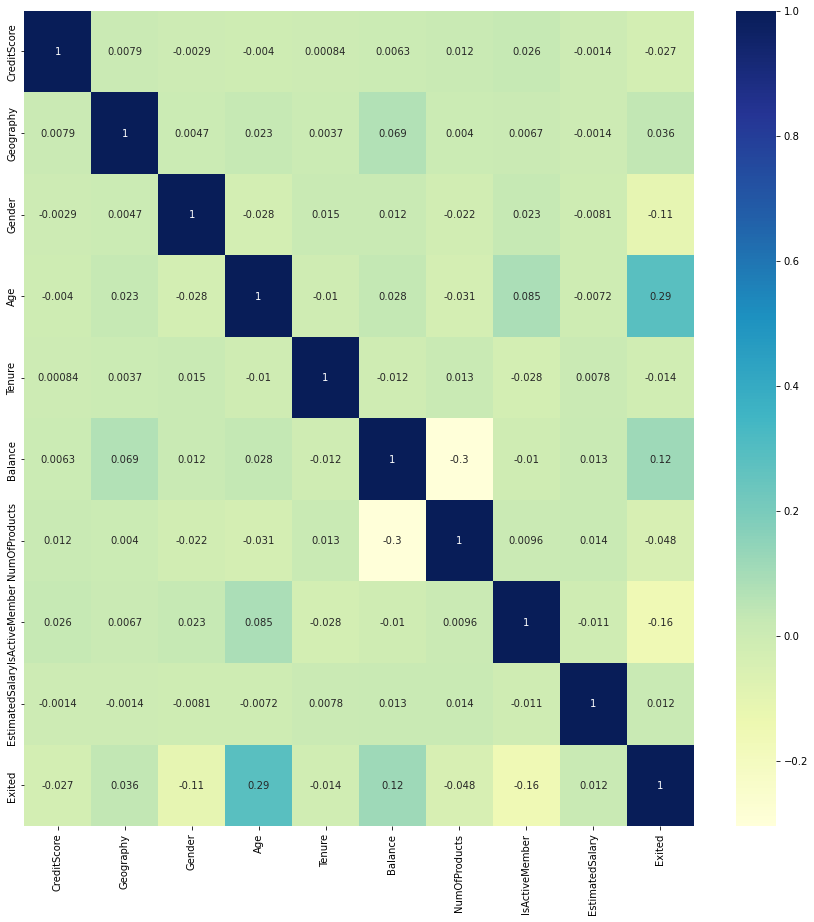

In [26]:
plt.figure(figsize=(15,15))
sb.heatmap(corr,annot=True,cbar=True,cmap='YlGnBu')
plt.show()

Observations:
Age, Balance, IsActiveMember and Gender  all three are highly correlated with output variable Exited.

#  Exploratory Data Analysis
# Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.

Text(0.5, 1.0, 'Gender Distribution')

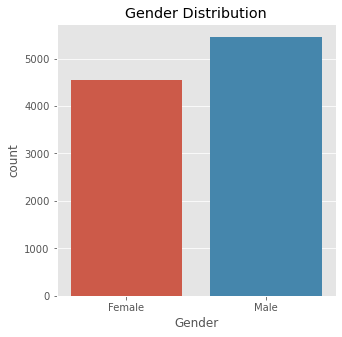

In [27]:
# Checking the distribution
plt.figure(figsize=(5,5))
style.use('ggplot')
sb.countplot(x='Gender',data=bank)
plt.title('Gender Distribution')

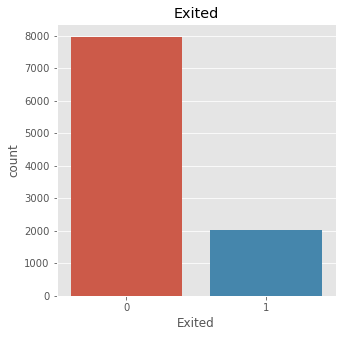

In [28]:
# Exited
plt.figure(figsize=(5,5))
sb.countplot(x='Exited',data=bank)
plt.title('Exited')
plt.show()

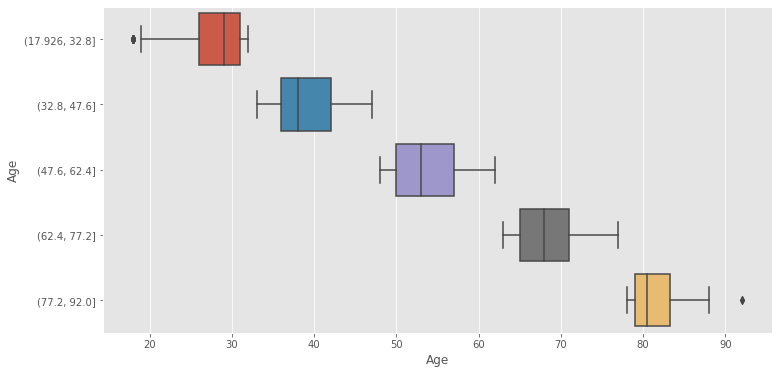

In [29]:
#Box Plot for Age
box=pd.cut(bank['Age'],bins=5)
plt.figure(figsize=(12,6))
sb.boxplot(y=box,x=bank['Age'])
plt.show()

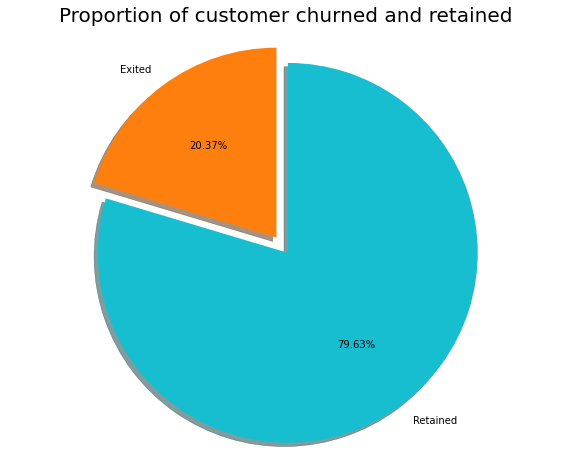

In [31]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode,colors = ['tab:orange', 'tab:cyan'], labels=labels, autopct='%.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained

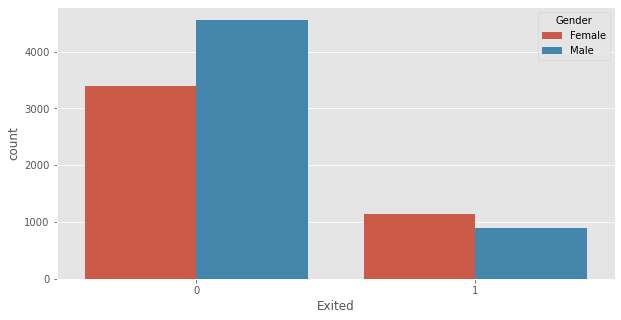

In [32]:
# Exit with gender
plt.figure(figsize=(10,5))
sb.countplot(data=bank,x='Exited',hue='Gender')
plt.show()

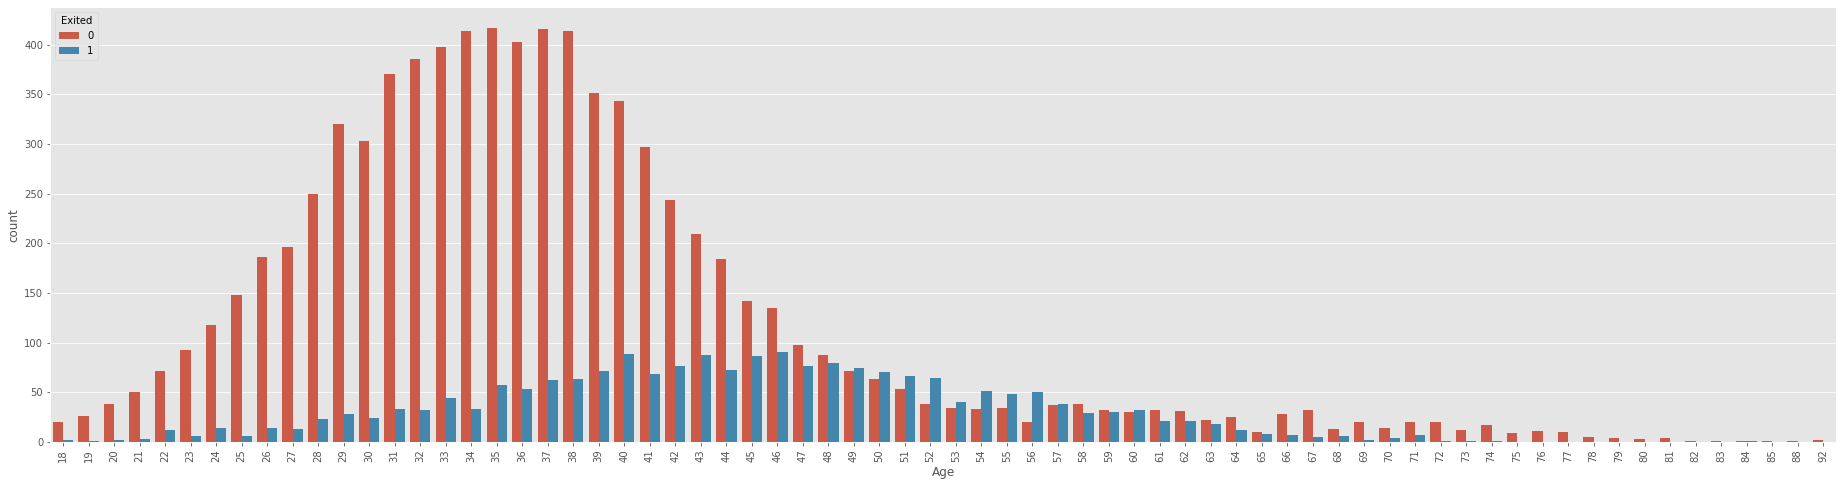

In [33]:
# income with education:
plt.figure(figsize=(32,8))
plt.xticks(rotation=90)
sb.countplot(data=df,x='Age',hue='Exited')
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

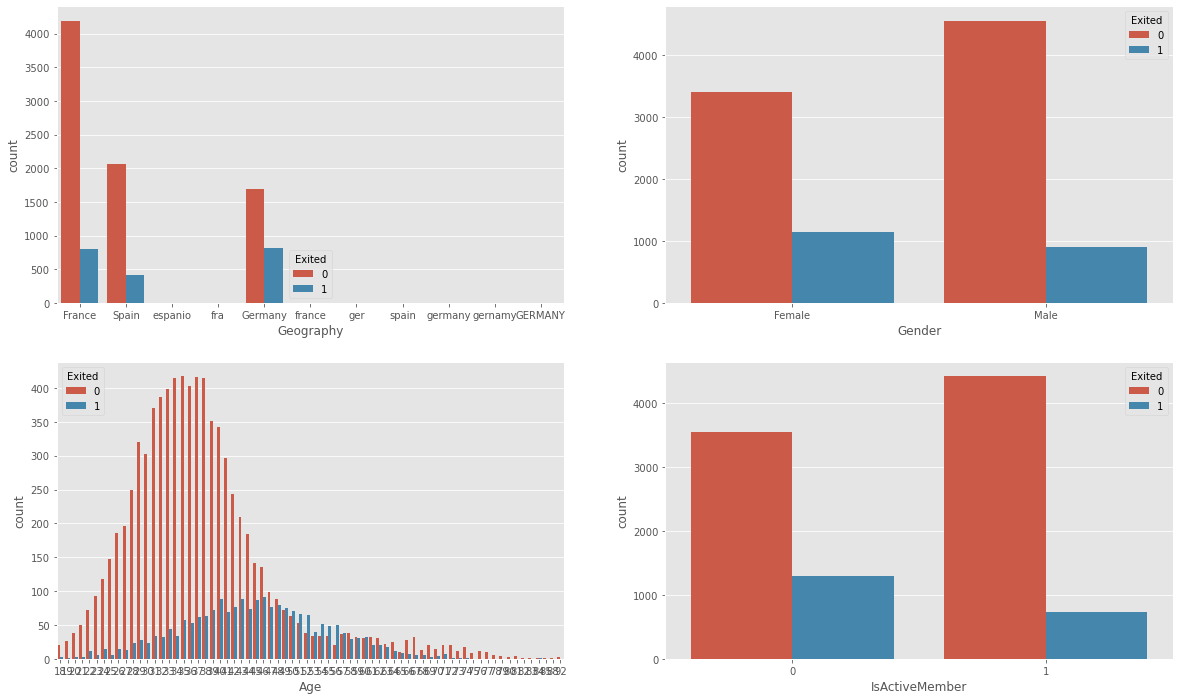

In [34]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sb.countplot(x='Geography', hue = 'Exited',data = bank, ax=axarr[0][0])
    sb.countplot(x='Gender', hue = 'Exited',data = bank, ax=axarr[0][1])
    sb.countplot(x='Age', hue = 'Exited',data = bank, ax=axarr[1][0])
    sb.countplot(x='IsActiveMember', hue = 'Exited',data = bank, ax=axarr[1][1])

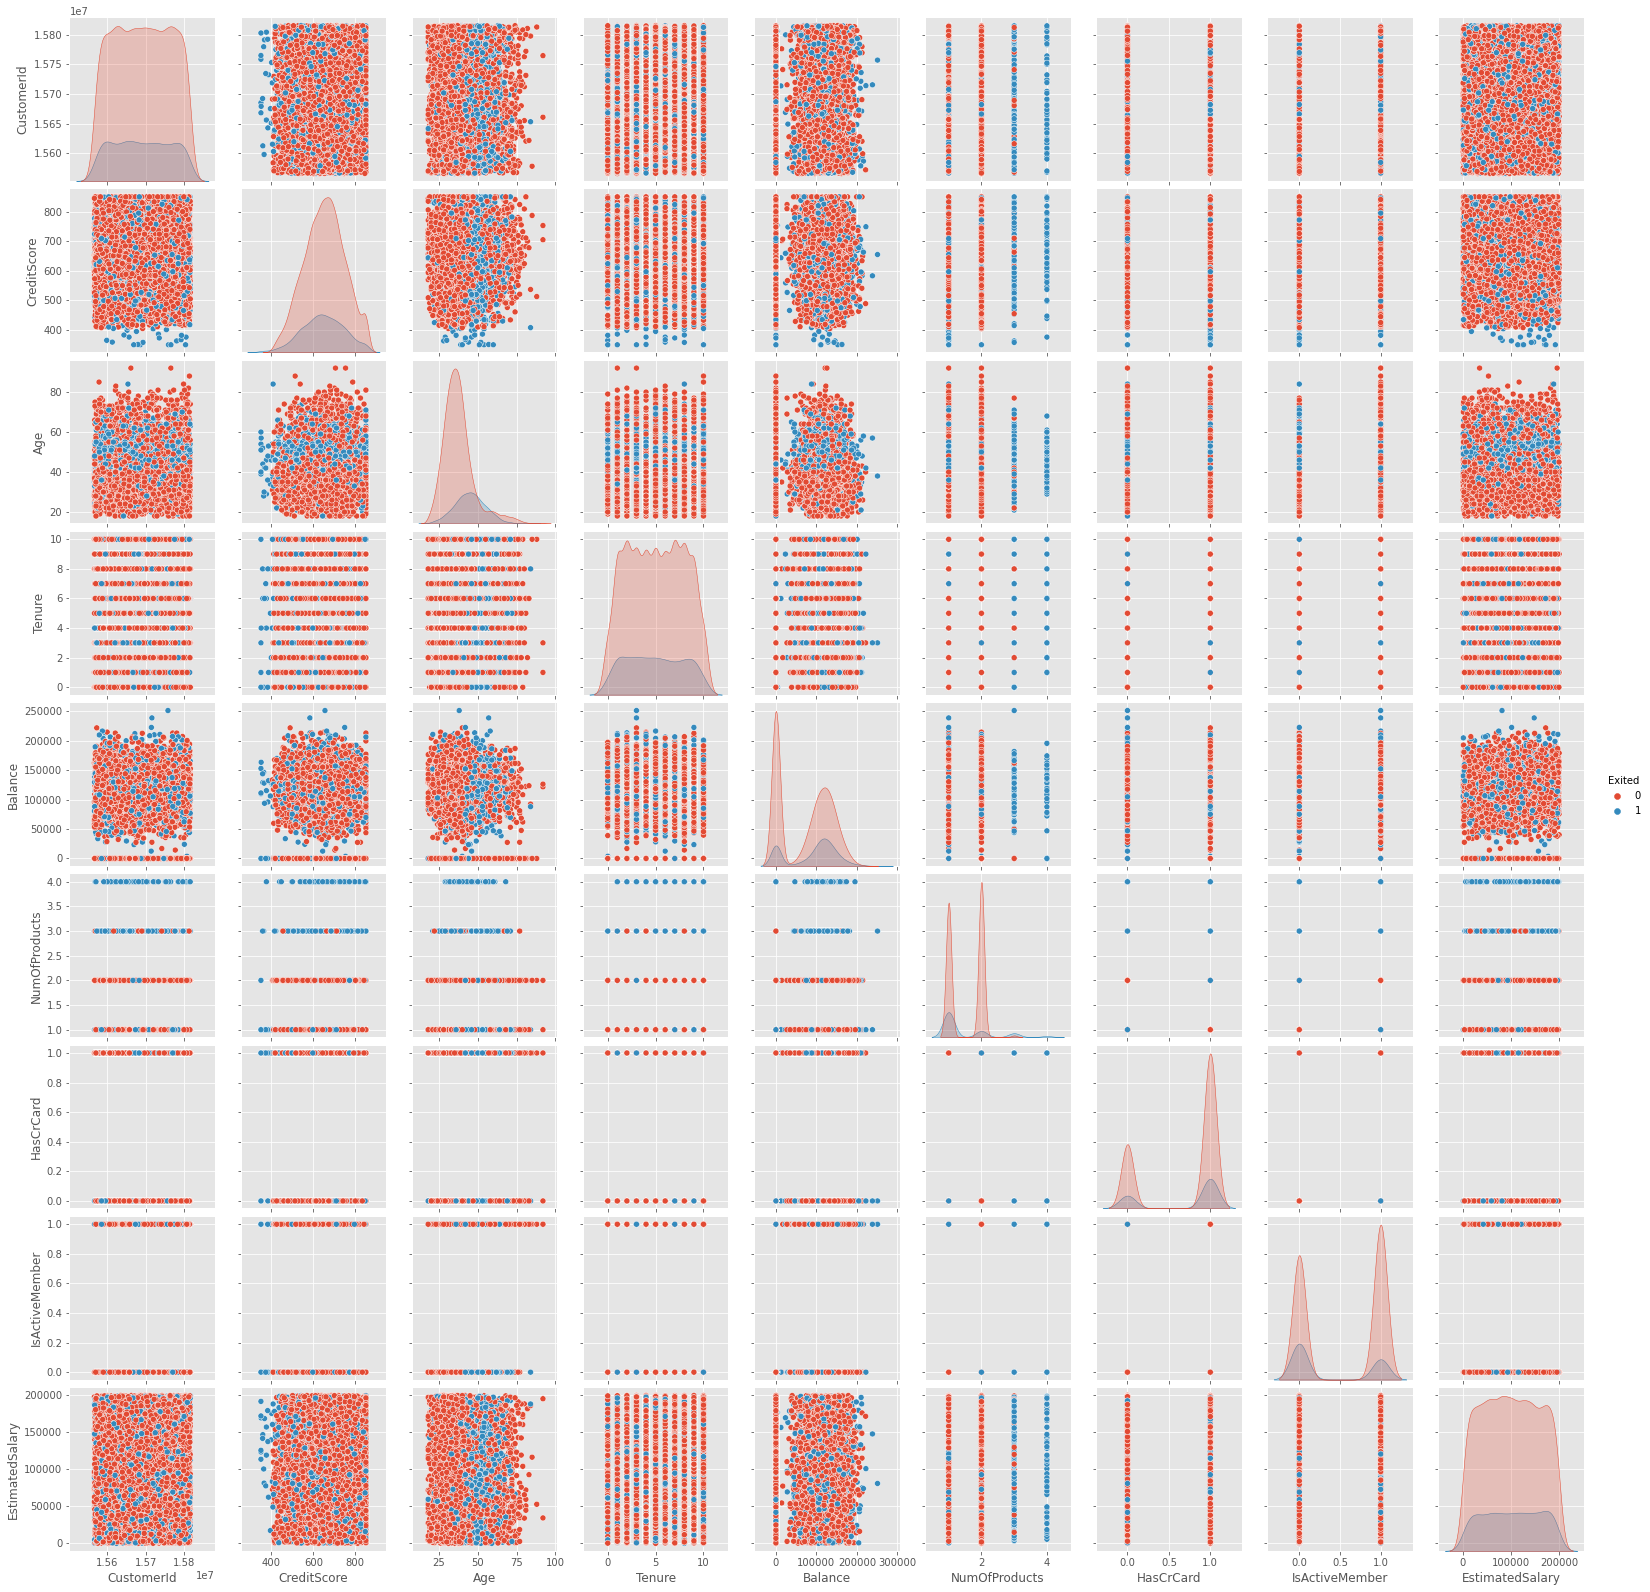

In [35]:
sb.pairplot(bank, hue ='Exited')
plt.show()

# Logistic Regression Univariate

##  Split the data into train set and test set in 80:20 ratio

In [36]:
x3=scaled_df['Age']
y3=scaled_df['Exited']

In [37]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.2,random_state=30)

In [38]:
x3_train=x3_train.values.reshape(-1,1)
x3_train

array([[0.27027027],
       [0.2972973 ],
       [0.32432432],
       ...,
       [0.18918919],
       [0.28378378],
       [0.28378378]])

In [39]:
x3_test=x3_test.values.reshape(-1,1)
x3_test.shape

(2000, 1)

In [40]:
y3_test = y3_test.values.reshape(-1,1)
y3_test.shape

(2000, 1)

In [41]:
y3_train =  y3_train.values.reshape(-1,1)
y3_train.shape

(8000, 1)

# Build a logistic Regression Model By Fitting The Training Dataset

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model2=LogisticRegression().fit(x3_train,y3_train)

In [44]:
# Predict the value of the test dataset using your model.

In [45]:
 y_pred3=model2.predict(x3_test)

In [46]:
 uni_df = pd.DataFrame()
uni_df['Y Predicted'] = pd.DataFrame(y_pred3)
uni_df['Y Actual'] = y3_test
uni_df

,Y Predicted,Y Actual
0,1.0,0.0
1,0.0,1.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
1995,0.0,1.0
1996,0.0,0.0
1997,0.0,0.0
1998,0.0,0.0


# Build a confusion matrix


In [47]:
 from sklearn.metrics import confusion_matrix
print(confusion_matrix(y3_test,y_pred3))

[[1505   59]
 [ 423   13]]


# Evaluate different evaluation metrics values and interpret the model performance

In [48]:
 train_accuracy3 =round(model2.score(x3_train,y3_train)*100,2)
train_accuracy3

77.95

In [49]:
test_accuracy3 =round(model2.score(x3_test,y3_test)*100,2)
test_accuracy3

75.9

In [50]:
print('Accuracy:  ',accuracy_score(y3_test,y_pred3))
print('F1-score:  ',f1_score(y3_test,y_pred3))
print('Recall:  ',recall_score(y3_test,y_pred3))
print('Precision:  ',precision_score(y3_test,y_pred3))

Accuracy:   0.759
F1-score:   0.051181102362204724
Recall:   0.02981651376146789
Precision:   0.18055555555555555


# Multi Logistic Regression

##  Split the data into train set and test set in 80:20 ratio

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x=scaled_df[['IsActiveMember','Balance','Age','Gender']]
y=scaled_df['Exited']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
x_train.shape

(8000, 4)

In [54]:
x_test.shape

(2000, 4)

In [55]:
y_test.shape

(2000,)

In [56]:
y_test = y_test.values.reshape(-1,1)
y_test.shape

(2000, 1)

In [57]:
y_train.shape

(8000,)

In [58]:
y_train =  y_train.values.reshape(-1,1)
y_train.shape

(8000, 1)

# Build a logistic Regression Model By Fitting The Training Dataset

In [59]:
model1=LogisticRegression().fit(x_train,y_train)

In [60]:
# Predict the value of the test dataset using your model.

In [61]:
 y_pred=model1.predict(x_test)

In [62]:
 uni_df = pd.DataFrame()
uni_df['Y Predicted'] = pd.DataFrame(y_pred)
uni_df['Y Actual'] = y_test
uni_df

,Y Predicted,Y Actual
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
1995,1.0,1.0
1996,0.0,0.0
1997,0.0,0.0
1998,0.0,0.0


In [63]:
# Build a confusion matrix


In [64]:
 from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1517   47]
 [ 375   61]]


# Evaluate different evaluation metrics values and interpret the model performance

In [122]:
 train_accuracy_logistic =round(model1.score(x_train,y_train)*100,2)
train_accuracy

80.97

In [123]:
test_accuracy_logistic =round(model1.score(x_test,y_test)*100,2)
test_accuracy

78.9

In [67]:
 coeff_df = pd.DataFrame()
coeff_df['Feature'] = x_train.columns
coeff_df['slope'] = pd.Series(model1.coef_[0])
coeff_df.sort_values(by = 'slope',ascending = False)
coeff_df.reset_index()

,index,Feature,slope
0,0,IsActiveMember,-1.026496
1,1,Balance,1.261899
2,2,Age,5.137880
3,3,Gender,-0.572658


In [141]:
acc_score1 = round(accuracy_score(y_test, y_pred)*100, 2)
f1_score1 = round(f1_score(y_test, y_pred, average='weighted')*100, 2)
Recall_score1 = round(recall_score(y_test, y_pred, average='weighted')*100, 2)
Precision_score1 = round(precision_score(y_test, y_pred, average='weighted')*100, 2)


print('Accuracy  = ',acc_score1,"%")
print('F1 Score  = ',f1_score1,"%")
print('Recall    = ',Recall_score1,"%")
print('Precision = ',Precision_score1,"%")

Accuracy  =  78.9 %
F1 Score  =  73.54 %
Recall    =  78.9 %
Precision =  75.01 %


In [69]:
 from sklearn.metrics import classification_report
    
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88      1564
         1.0       0.56      0.14      0.22       436

    accuracy                           0.79      2000
   macro avg       0.68      0.55      0.55      2000
weighted avg       0.75      0.79      0.74      2000



In [125]:
 # ROC-AUC 
from sklearn.metrics import roc_auc_score
roc1=roc_auc_score(y_test,model1.predict_proba(x_test)[:,1])
roc1

0.7548276590253173

In [126]:
auc_log1 = roc_auc_score(y_test,y_pred)
auc_log1

0.5549285529927966

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.755


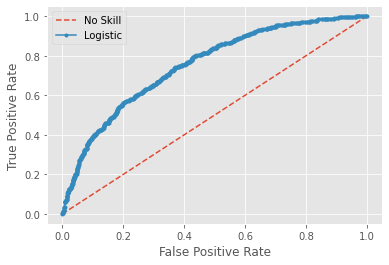

In [127]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model1.predict_proba(x_test)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

# Decision Tree Classifier

In [73]:
x1=scaled_df[['IsActiveMember','Balance','Age','Gender']]
y1=scaled_df['Exited']

In [74]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=30)
x1_train.shape

(8000, 4)

In [75]:
x1_test.shape

(2000, 4)

In [76]:
y1_test.shape

(2000,)

In [77]:
y1_test = y1_test.values.reshape(-1,1)
y1_test.shape

(2000, 1)

In [78]:
y1_train =  y1_train.values.reshape(-1,1)
y1_train.shape

(8000, 1)

In [79]:
 # Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

max_depth_range = list(range(1, 10))
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    clf.fit(x1_train, y1_train)    
    score = clf.score(x1_test, y1_test)
    accuracy.append(score)
    
accuracy

[0.782, 0.815, 0.816, 0.82, 0.824, 0.825, 0.826, 0.8175, 0.8165]

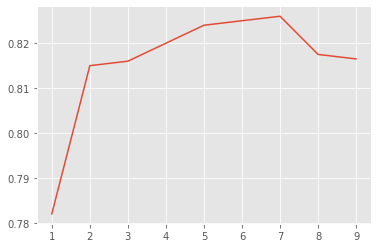

In [80]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(1,10), accuracy)
plt.show()

# Since the highest accuracy is for depth = 7 the model should have max_depth 7

In [81]:
model_tree = DecisionTreeClassifier(max_depth=7, random_state=10)
model_tree.fit(x1_train, y1_train)

DecisionTreeClassifier(max_depth=7, random_state=10)

In [82]:
 # Predicting Y values 

y_pred_tree = model_tree.predict(x1_test)

tree_df = pd.DataFrame()
tree_df['Y predicted'] = pd.DataFrame(y_pred_tree)
tree_df['Y actual'] = y1_test
tree_df

,Y predicted,Y actual
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
1995,1.0,1.0
1996,0.0,0.0
1997,0.0,0.0
1998,0.0,0.0


In [83]:
train_score_tree = round(model_tree.score(x1_train, y1_train)*100 , 2)
print('Train Accuracy for this model is {} %'.format(train_score_tree))

test_score_tree = round(model_tree.score(x1_test, y1_test)*100 , 2)
print('Test Accuracy for this model is {} %'.format(test_score_tree))

Train Accuracy for this model is 84.46 %
Test Accuracy for this model is 82.6 %


#  Visualization of Tree map

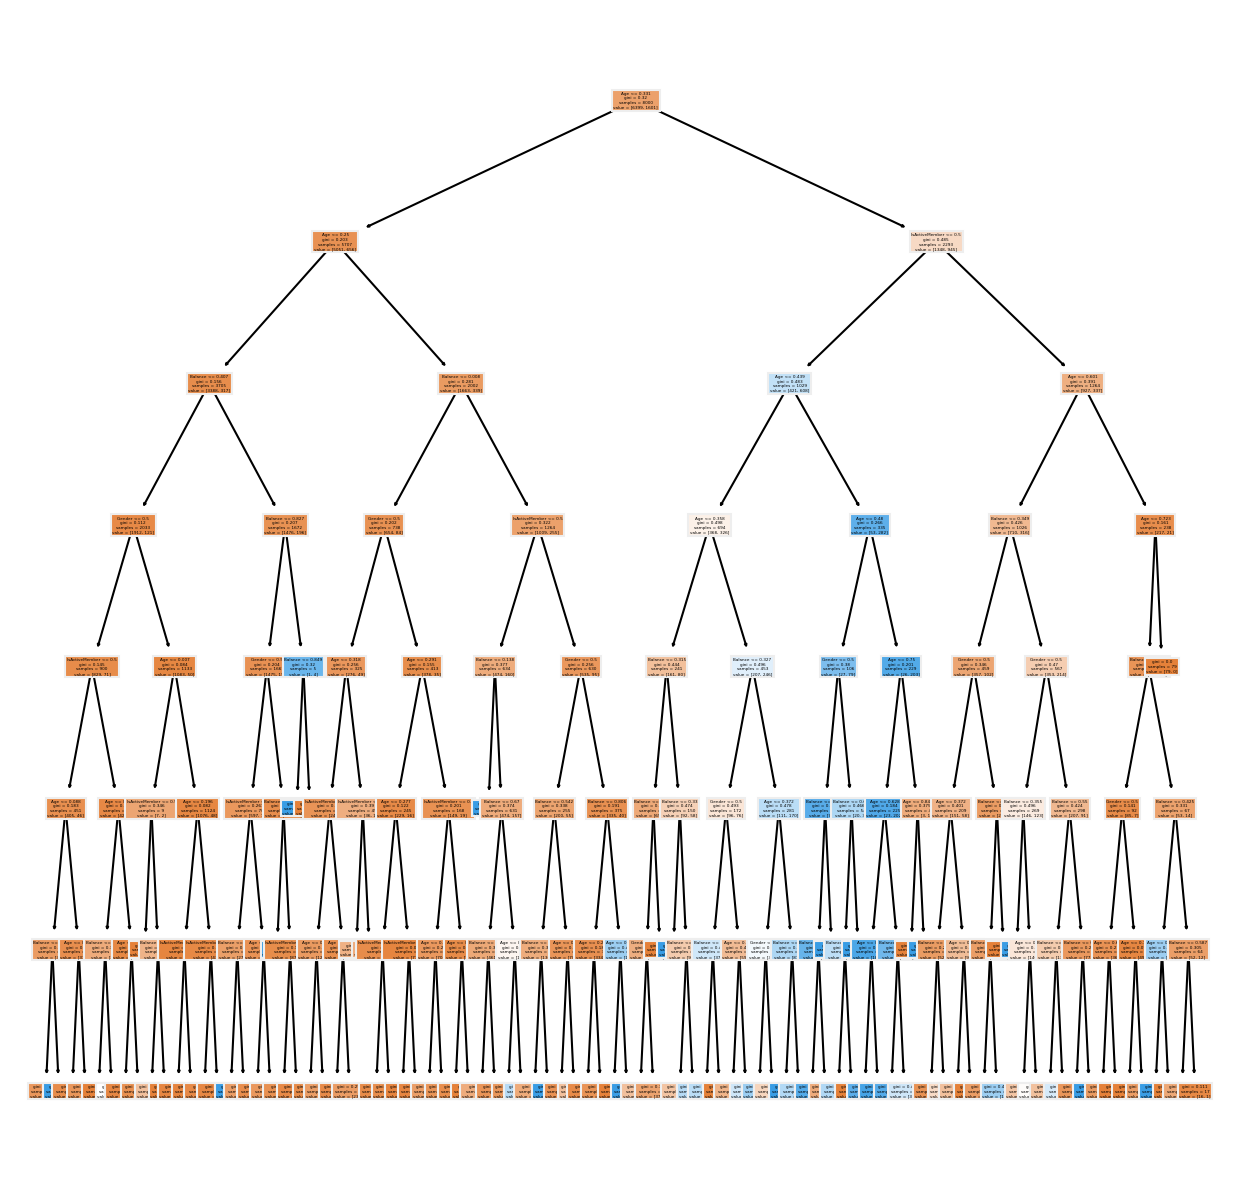

In [84]:
from sklearn import tree

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 300)
tree.plot_tree(model_tree, feature_names = x1.columns , filled = True)
plt.show()

In [85]:
acc_score2 = round(accuracy_score(y_test, y_pred_tree)*100, 2)
f1_score2 = round(f1_score(y_test, y_pred_tree, average='weighted')*100, 2)
recall_score2 = round(recall_score(y_test, y_pred_tree, average='weighted')*100, 2)
prec_score2 = round(precision_score(y_test, y_pred_tree, average='weighted')*100, 2)


print('Accuracy  = ',acc_score2,"%")
print('F1 Score  = ',f1_score2,"%")
print('Recall    = ',recall_score2,"%")
print('Precision = ',prec_score2,"%")

Accuracy  =  82.6 %
F1 Score  =  80.01 %
Recall    =  82.6 %
Precision =  81.19 %


In [86]:
# evaluate the model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_tree, x, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
                           
print(n_scores)

# report performance

print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

[0.81036264 0.78140767 0.78393947 0.8048     0.79743604 0.80250353
 0.8107472  0.79152053 0.82403707 0.80903248 0.79027177 0.82233098
 0.78643278 0.78662857 0.8030022  0.79940594 0.82101968 0.81425117
 0.81163976 0.78082762 0.79739843 0.79429043 0.80492683 0.79575797
 0.81004894 0.81967636 0.80127929 0.78756269 0.80023239 0.80945937]
F1-Score: 0.802 (0.012)


In [128]:
from sklearn.metrics import roc_auc_score
roc2=roc_auc_score(y1_test,clf.predict_proba(x1_test)[:,1])
roc2

0.7664443968652479

In [129]:
auc_log2= roc_auc_score(y1_test,y_pred_tree)
auc_log2

0.6480618972758628

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.766


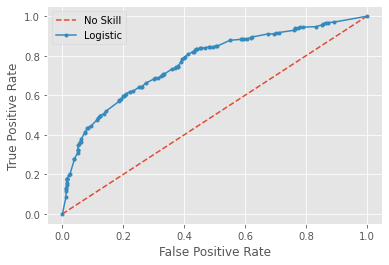

In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y1_test))]
lr_probs = clf.predict_proba(x1_test)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y1_test, ns_probs)
lr_auc = roc_auc_score(y1_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y1_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y1_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

# Random Forest Classifier

In [88]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [89]:
x2=scaled_df[['IsActiveMember','Balance','Age','Gender']]
y2=scaled_df['Exited']

In [90]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=30)
x2_train.shape

(8000, 4)

In [91]:
x2_test.shape

(2000, 4)

In [92]:
y2_test.shape

(2000,)

In [93]:
y2_test = y2_test.values.reshape(-1,1)
y2_test.shape

(2000, 1)

In [94]:
y2_train =  y2_train.values.reshape(-1,1)
y2_train.shape

(8000, 1)

# Modelling

In [95]:
model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [96]:
params = {
 'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
} 

In [97]:
# Grid Search for cross validation 
from sklearn.model_selection import GridSearchCV

In [98]:
grid_search = GridSearchCV(estimator=model_rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=3, scoring="accuracy")

In [99]:
 %%time
grid_search.fit(x2_train, y2_train) 

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 3.25 s
Wall time: 2min 11s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [100]:
GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=3)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [101]:
grid_search.best_score_ 

0.8380000000000001

In [102]:
model_rf_best = grid_search.best_estimator_
model_rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [103]:
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [104]:
classifier_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,n_jobs=-1, random_state=42, oob_score=True)

In [105]:
 %%time
classifier_rf.fit(x2_train, y2_train)
 

CPU times: total: 562 ms
Wall time: 294 ms


RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, oob_score=True, random_state=42)

In [106]:
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, oob_score=True, random_state=42)

In [107]:
 classifier_rf.oob_score_

0.825625

# Oob Score is 0.82  Hence the model is validated

In [108]:
train_score = round(classifier_rf.score(x2_train, y2_train)*100, 2)
train_score

86.24

In [109]:
test_score = round(classifier_rf.score(x2_test, y2_test)*100,2)
test_score

82.1

In [110]:
# Evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores1 = cross_val_score(classifier_rf, x, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

print(n_scores)
# report performance     
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores1), np.std(n_scores1)))

[0.81036264 0.78140767 0.78393947 0.8048     0.79743604 0.80250353
 0.8107472  0.79152053 0.82403707 0.80903248 0.79027177 0.82233098
 0.78643278 0.78662857 0.8030022  0.79940594 0.82101968 0.81425117
 0.81163976 0.78082762 0.79739843 0.79429043 0.80492683 0.79575797
 0.81004894 0.81967636 0.80127929 0.78756269 0.80023239 0.80945937]
F1-Score: 0.804 (0.009)


In [118]:
y_pred_forest = classifier_rf.predict(x2_test)

forest_df = pd.DataFrame()
forest_df['Y predicted'] = pd.DataFrame(y_pred_forest)
forest_df['Y actual'] = y2_test
forest_df

,Y predicted,Y actual
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
1995,1.0,1.0
1996,0.0,0.0
1997,0.0,0.0
1998,0.0,0.0


In [119]:
acc_score3 = round(accuracy_score(y2_test, y_pred_forest)*100, 2)
f1_score3 = round(f1_score(y2_test, y_pred_forest, average='weighted')*100, 2)
recall_score3 = round(recall_score(y2_test, y_pred_forest, average='weighted')*100, 2)
prec_score3 = round(precision_score(y2_test, y_pred_forest, average='weighted')*100, 2)


print('Accuracy  = ',acc_score3,"%")
print('F1 Score  = ',f1_score3,"%")
print('Recall    = ',recall_score3,"%")
print('Precision = ',prec_score3,"%")

Accuracy  =  82.1 %
F1 Score  =  79.97 %
Recall    =  82.1 %
Precision =  80.33 %


In [131]:
from sklearn.metrics import roc_auc_score
roc3=roc_auc_score(y2_test,classifier_rf.predict_proba(x1_test)[:,1])
roc3

0.7713255824866845

In [132]:
auc_log3=roc_auc_score(y2_test,y_pred_forest)
auc_log3

0.6547901170839296

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.771


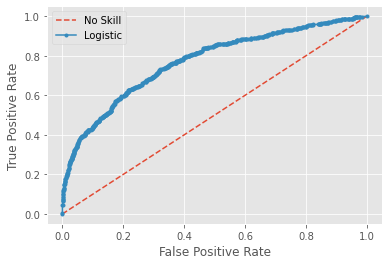

In [133]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y2_test))]
lr_probs = classifier_rf.predict_proba(x2_test)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y2_test, ns_probs)
lr_auc = roc_auc_score(y2_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y2_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y2_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [142]:
score_df = pd.DataFrame()
score_df['Model'] = ['Decision Tree' , 'Random Forest', 'Logistic Regression']
score_df['Train Accuracy'] = [train_score_tree , train_score, train_accuracy_logistic ]
score_df['Test Accuracy'] = [test_score_tree , test_score, test_accuracy_logistic ]
score_df['F1 Score'] = [f1_score2, f1_score3, f1_score1]
score_df['Accuracy']=[acc_score2, acc_score3, acc_score1]
score_df['Precison']=[prec_score2, prec_score3, Precision_score1]
score_df['Recall']=[recall_score2, recall_score3, Recall_score1]
score_df['ROC_score']=[roc2, roc3, roc1]
score_df['Auc_score']=[auc_log2, auc_log3, auc_log1]

In [143]:
score_df

,Model,Train Accuracy,Test Accuracy,F1 Score,Accuracy,Precison,Recall,ROC_score,Auc_score
0,Decision Tree,84.46,82.6,80.01,82.6,81.19,82.6,0.766444,0.648062
1,Random Forest,86.24,82.1,79.97,82.1,80.33,82.1,0.771326,0.654790
2,Logistic Regression,80.97,78.9,73.54,78.9,75.01,78.9,0.754828,0.554929
